<h1>Data Processing</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import plotly.express as px

In [7]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/ML/Thesis/my_dataset/Detection/Final_Dataset_without_duplicate.csv')
# Load your CSV dataset (replace 'your_dataset.csv' with your actual dataset)
data = data.drop(['Category'], axis=1)
data = data.drop(['Family'], axis=1)
data = data.drop(['md5'], axis=1)
data = data.drop(['sha1'], axis=1)
data = data.drop(['PEType'], axis=1)
data = data.drop(['file_extension'], axis=1)
data = data.drop(['MachineType'], axis=1)
data = data.drop(['magic_number'], axis=1)
data = data.drop(['Magic'], axis=1)
data = data.drop(['network_threats'], axis=1)
data = data.drop(['text_Characteristics'], axis=1)
data = data.drop(['rdata_Characteristics'], axis=1)
data = data.drop(['OperatingSystemVersion'], axis=1)
data = data.drop(['ImageVersion'], axis=1)
data = data.drop(['Subsystem'], axis=1)
data = data.drop(['DllCharacteristics'], axis=1)
data = data.drop(['AddressOfEntryPoint'], axis=1)
data = data.drop(['oem_identifier'], axis=1)
data = data.drop(['rdata_PointerToRelocations'], axis=1)
data = data.drop(['init_ss_value'], axis=1)
data = data.drop(['LoaderFlags'], axis=1)
data = data.drop(['init_ip_value'], axis=1)
data = data.drop(['init_cs_value'], axis=1)
data = data.drop(['text_PointerToLineNumbers'], axis=1)
data = data.drop(['rdata_PointerToLineNumbers'], axis=1)
data = data.drop(['text_PointerToRelocations'], axis=1)

In [8]:
# Load the dataset
df = data
# Convert hexadecimal values to numeric
df['EntryPoint'] = df['EntryPoint'].apply(lambda x: int(x, 16))
df['bytes_on_last_page'] = df['bytes_on_last_page'].apply(lambda x: int(x, 16))
df['pages_in_file'] = df['pages_in_file'].apply(lambda x: int(x, 16))
df['relocations'] = df['relocations'].apply(lambda x: int(x, 16))
df['size_of_header'] = df['size_of_header'].apply(lambda x: int(x, 16))
df['min_extra_paragraphs'] = df['min_extra_paragraphs'].apply(lambda x: int(x, 16))
df['max_extra_paragraphs'] = df['max_extra_paragraphs'].apply(lambda x: int(x, 16))
#df['init_ss_value'] = df['init_ss_value'].apply(lambda x: int(x, 16))
df['init_sp_value'] = df['init_sp_value'].apply(lambda x: int(x, 16))
#df['init_ip_value'] = df['init_ip_value'].apply(lambda x: int(x, 16))
#df['init_cs_value'] = df['init_cs_value'].apply(lambda x: int(x, 16))
df['over_lay_number'] = df['over_lay_number'].apply(lambda x: int(x, 16))
#df['oem_identifier'] = df['oem_identifier'].apply(lambda x: int(x, 16))
df['address_of_ne_header'] = df['address_of_ne_header'].apply(lambda x: int(x, 16))
df['SizeOfCode'] = df['SizeOfCode'].apply(lambda x: int(x, 16))
df['SizeOfInitializedData'] = df['SizeOfInitializedData'].apply(lambda x: int(x, 16))
df['SizeOfUninitializedData'] = df['SizeOfUninitializedData'].apply(lambda x: int(x, 16))
#df['AddressOfEntryPoint'] = df['AddressOfEntryPoint'].apply(lambda x: int(x, 16))
df['BaseOfCode'] = df['BaseOfCode'].apply(lambda x: int(x, 16))
df['BaseOfData'] = df['BaseOfData'].apply(lambda x: int(x, 16))
df['ImageBase'] = df['ImageBase'].apply(lambda x: int(x, 16))
df['SectionAlignment'] = df['SectionAlignment'].apply(lambda x: int(x, 16))
df['FileAlignment'] = df['FileAlignment'].apply(lambda x: int(x, 16))
df['SizeOfImage'] = df['SizeOfImage'].apply(lambda x: int(x, 16))
df['SizeOfHeaders'] = df['SizeOfHeaders'].apply(lambda x: int(x, 16))
df['Checksum'] = df['Checksum'].apply(lambda x: int(x, 16))
df['SizeofStackReserve'] = df['SizeofStackReserve'].apply(lambda x: int(x, 16))
df['SizeofStackCommit'] = df['SizeofStackCommit'].apply(lambda x: int(x, 16))
df['SizeofHeapCommit'] = df['SizeofHeapCommit'].apply(lambda x: int(x, 16))
df['SizeofHeapReserve'] = df['SizeofHeapReserve'].apply(lambda x: int(x, 16))
#df['LoaderFlags'] = df['LoaderFlags'].apply(lambda x: int(x, 16))
df['text_VirtualSize'] = df['text_VirtualSize'].apply(lambda x: int(x, 16))
df['text_VirtualAddress'] = df['text_VirtualAddress'].apply(lambda x: int(x, 16))
df['text_SizeOfRawData'] = df['text_SizeOfRawData'].apply(lambda x: int(x, 16))
df['text_PointerToRawData'] = df['text_PointerToRawData'].apply(lambda x: int(x, 16))
#df['text_PointerToRelocations'] = df['text_PointerToRelocations'].apply(lambda x: int(x, 16))
#df['text_PointerToLineNumbers'] = df['text_PointerToLineNumbers'].apply(lambda x: int(x, 16))
df['rdata_VirtualSize'] = df['rdata_VirtualSize'].apply(lambda x: int(x, 16))
df['rdata_VirtualAddress'] = df['rdata_VirtualAddress'].apply(lambda x: int(x, 16))
df['rdata_SizeOfRawData'] = df['rdata_SizeOfRawData'].apply(lambda x: int(x, 16))
df['rdata_PointerToRawData'] = df['rdata_PointerToRawData'].apply(lambda x: int(x, 16))
#df['rdata_PointerToRelocations'] = df['rdata_PointerToRelocations'].apply(lambda x: int(x, 16))
#df['rdata_PointerToLineNumbers'] = df['rdata_PointerToLineNumbers'].apply(lambda x: int(x, 16))

In [9]:
# Assuming you have a DataFrame named 'df'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Class']
df = pd.DataFrame(df)

In [10]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

<h2>Inter-class Similarity and & Intra-class Similarity</h2>

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data = df
# Assuming 'data' is your dataset and 'Class' is the column containing labels
labels = data['Class'].values

# Assuming 'data' is a pandas DataFrame, you can extract only the feature columns
data_features = data.drop('Class', axis=1).values

# Randomly sample a subset of the data
sample_indices = np.random.choice(len(data_features), size=5000, replace=False)
data_sample = data_features[sample_indices]
labels_sample = labels[sample_indices]

# Calculate pairwise distances between sampled data points
pairwise_distances = np.linalg.norm(data_sample[:, np.newaxis] - data_sample, axis=2)

# Calculate average intra-class similarity within each class
intra_class_similarity = np.mean(pairwise_distances[labels_sample[:, np.newaxis] == labels_sample])

# Calculate average inter-class similarity between different classes
inter_class_similarity = np.mean(pairwise_distances[labels_sample[:, np.newaxis] != labels_sample])

print("Intra-class similarity:", intra_class_similarity)
print("Inter-class similarity:", inter_class_similarity)

# Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_sample)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_sample, cmap='rainbow')
plt.title("t-SNE Visualization of Sampled Data")
plt.show()


<h2>Balance & In-balance<h2>

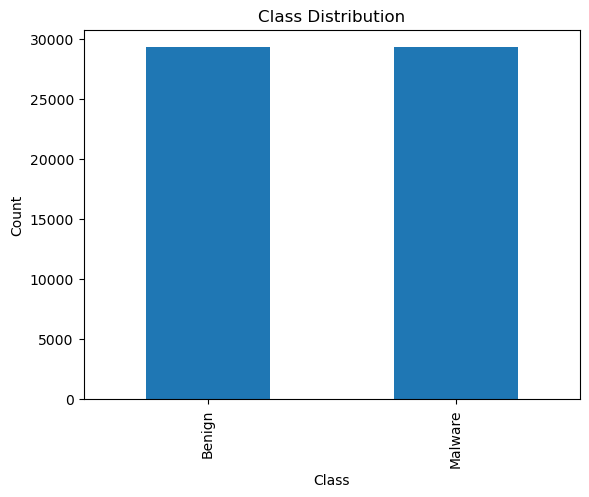

Imbalance Ratio: 1.0


In [ ]:
# Assuming 'data' is your dataset with the class labels in the column 'Class'
data = df
class_counts = data['Class'].value_counts()
# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Check if the dataset is balanced or imbalanced
imbalance_ratio = class_counts.max() / class_counts.min()
print("Imbalance Ratio:", imbalance_ratio)

<h2>Feature Selection</h2>

<h3>Univariate Feature Selection</h3>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # You can use other scoring functions for different types of problems.

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
#Separate the features from the target variable (if applicable)
uni_data = df

uni_data = uni_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
uni_X = data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
uni_y = data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the Univariate Feature Selector
num_features_to_select = 35  # You can set this to the number of features you want to select.
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Step 3: Fit the selector on the data
X_selected = selector.fit_transform(uni_X, uni_y)

# Step 4: Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Step 5: Get the names of the selected features
selected_feature_names = uni_X.columns[selected_feature_indices]

# Step 6: Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, uni_y], axis=1)

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg',
       'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_deskthrd_false_avg',
       'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.process_services', 'svcscan.shared_process_services',
       'svcscan.nactive', 'callbacks.ncallbacks', 'Category', 'Family'],
      dtype='object')


<strong>Graphical View</strong>

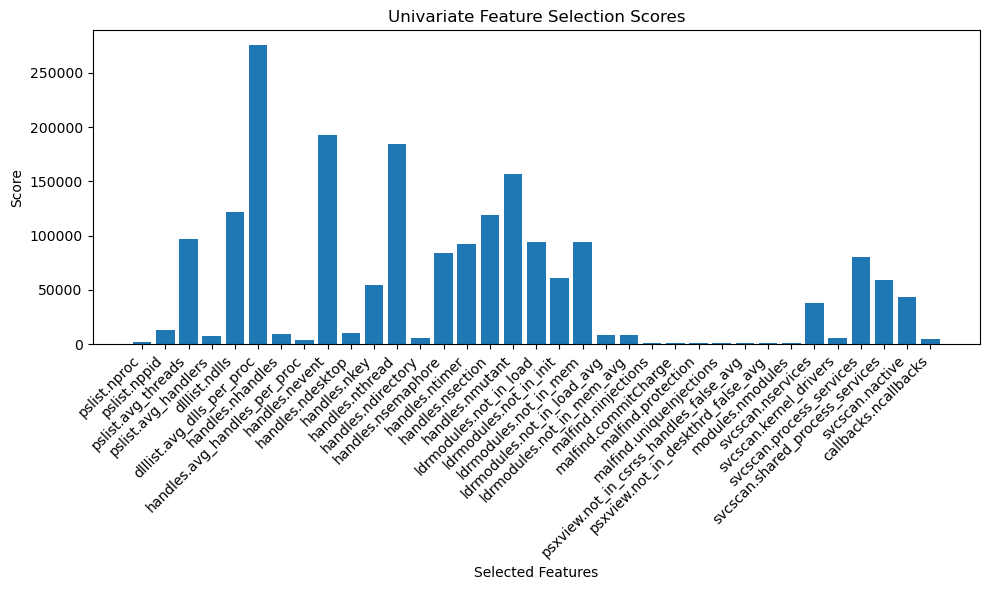

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.

# Step 1: Split the data into features (X) and target (y).
uni2_data = df
uni2_data = uni2_data.drop(['Category', 'Family'], axis=1)

uni2_X = uni2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
uni2_y = uni2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the Univariate Feature Selector
num_features_to_select = 35  # You can set this to the number of features you want to select.
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Step 3: Fit the selector on the data
X_selected = selector.fit_transform(uni2_X, uni2_y)

# Step 4: Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Step 5: Get the names of the selected features
selected_feature_names = uni2_X.columns[selected_feature_indices]

# Step 6: Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Plot the scores of the selected features
scores = selector.scores_[selected_feature_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), scores, tick_label=selected_feature_names)
plt.xlabel('Selected Features')
plt.ylabel('Score')
plt.title('Univariate Feature Selection Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Recursive Feature Elimination (RFE)</h3>

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # You can use any estimator of your choice.

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
rec_data = df
rec_data = rec_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
rec_X = rec_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
rec_y = rec_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the estimator (classifier/regressor).
estimator = LogisticRegression()  # You can use any other classifier/regressor of your choice.

# Step 3: Initialize the Recursive Feature Elimination (RFE) object
num_features_to_select = 35  # You can set this to the number of features you want to select.
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Step 4: Fit RFE on the data
X_selected = rfe.fit_transform(rec_X, rec_y)

# Step 5: Get the indices of the selected features
selected_feature_indices = rfe.get_support(indices=True)

# Step 6: Get the names of the selected features
selected_feature_names = rec_X.columns[selected_feature_indices]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, rec_y], axis=1)

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init',
       'ldrmodules.not_in_mem', 'malfind.ninjections', 'malfind.commitCharge',
       'malfind.protection', 'psxview.not_in_pslist',
       'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list',
       'psxview.not_in_csrss_handles', 'psxview.not_in_session',
       'psxview.not_in_deskthrd', 'modules.nmodules', 'svcscan.nservices',
       'svcscan.kernel_drivers', 'svcscan.fs_drivers',
       'svcscan.shared_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks'],
      dtype='object')


<strong>Graphical View</strong>

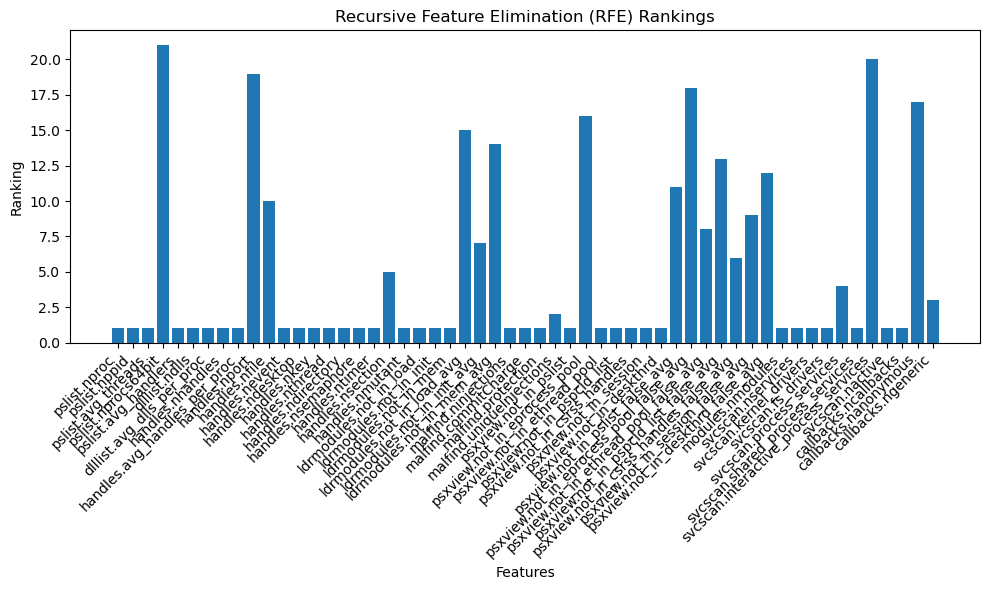

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
rec2_data = df
rec2_data = rec2_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
rec2_X = rec2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
rec2_y = rec2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the estimator (classifier/regressor).
estimator = LogisticRegression()  # You can use any other classifier/regressor of your choice.

# Step 3: Initialize the Recursive Feature Elimination (RFE) object
num_features_to_select = 35  # You can set this to the number of features you want to select.
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Step 4: Fit RFE on the data
X_selected = rfe.fit_transform(rec2_X, rec2_y)

# Step 5: Get the indices of the selected features
selected_feature_indices = rfe.get_support(indices=True)

# Step 6: Get the names of the selected features
selected_feature_names = rec2_X.columns[selected_feature_indices]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Plot the feature rankings
ranking = rfe.ranking_
plt.figure(figsize=(10, 6))
plt.bar(range(len(rec2_X.columns)), ranking, tick_label=rec2_X.columns)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Feature Importance from Trees</h3>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # You can use RandomForestRegressor for regression tasks.

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
f_data = df
f_data = f_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
f_X = f_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
f_y = f_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the RandomForestClassifier (or RandomForestRegressor for regression tasks)
rf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed.

# Step 3: Fit the Random Forest model on the data
rf.fit(f_X, f_y)

# Step 4: Get the feature importances from the model
feature_importances = rf.feature_importances_

# Step 5: Sort the features and their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = f_X.columns[sorted_indices]

# Step 6: Select the top 'num_features_to_select' important features
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_feature_importances = sorted_feature_importances[:num_features_to_select]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = f_X[selected_feature_names]

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, f_y], axis=1)

# Print the names of the selected features and their importances
print("Selected Features:")
print(selected_feature_names)
print("Feature Importances:")
print(selected_feature_importances)


Selected Features:
Index(['svcscan.nservices', 'svcscan.kernel_drivers',
       'handles.avg_handles_per_proc', 'handles.nmutant', 'handles.nsection',
       'pslist.avg_handlers', 'handles.nkey', 'handles.nhandles',
       'dlllist.ndlls', 'svcscan.shared_process_services', 'handles.nthread',
       'dlllist.avg_dlls_per_proc', 'handles.nevent', 'handles.nsemaphore',
       'ldrmodules.not_in_mem', 'ldrmodules.not_in_load', 'svcscan.nactive',
       'pslist.avg_threads', 'handles.nfile', 'ldrmodules.not_in_mem_avg',
       'malfind.uniqueInjections', 'svcscan.process_services',
       'handles.ntimer', 'pslist.nproc', 'ldrmodules.not_in_load_avg',
       'ldrmodules.not_in_init_avg', 'psxview.not_in_deskthrd',
       'psxview.not_in_deskthrd_false_avg', 'pslist.nppid',
       'callbacks.ncallbacks', 'malfind.protection', 'malfind.commitCharge',
       'malfind.ninjections', 'handles.ndirectory',
       'psxview.not_in_csrss_handles_false_avg'],
      dtype='object')
Feature Importance

<strong>Graphical View<strong>

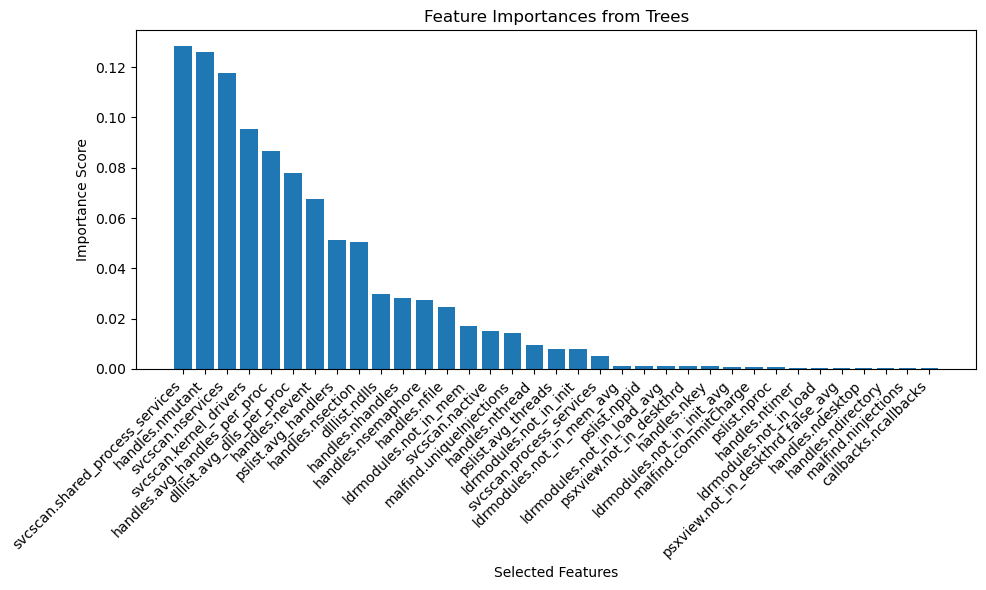

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
f2_data = df
f2_data = f2_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
f2_X = f2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
f2_y = f2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the RandomForestClassifier (or RandomForestRegressor for regression tasks)
rf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed.

# Step 3: Fit the Random Forest model on the data
rf.fit(f2_X, f2_y)

# Step 4: Get the feature importances from the model
feature_importances = rf.feature_importances_

# Step 5: Sort the features and their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = f2_X.columns[sorted_indices]

# Step 6: Select the top 'num_features_to_select' important features
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_feature_importances = sorted_feature_importances[:num_features_to_select]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = f2_X[selected_feature_names]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), selected_feature_importances, tick_label=selected_feature_names)
plt.xlabel('Selected Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Trees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>L1 Regularization (Lasso) </h3>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
l_data = df
l_data = l_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
l_X = l_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
l_y = l_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the Logistic Regression model with L1 regularization (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Step 3: Fit the Lasso model on the data
lasso.fit(l_X, l_y)

# Step 4: Get the feature coefficients from the model
feature_coefficients = lasso.coef_[0]

# Step 5: Sort the features and their coefficients in descending order
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
sorted_feature_coefficients = feature_coefficients[sorted_indices]
sorted_feature_names = l_X.columns[sorted_indices]

# Step 6: Select the top 'num_features_to_select' important features
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_feature_coefficients = sorted_feature_coefficients[:num_features_to_select]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = l_X[selected_feature_names]

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, l_y], axis=1)

# Print the names of the selected features and their coefficients
print("Selected Features:")
print(selected_feature_names)
print("Feature Coefficients:")
print(selected_feature_coefficients)


Selected Features:
Index(['ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg',
       'ldrmodules.not_in_load_avg', 'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_deskthrd_false_avg', 'psxview.not_in_pslist_false_avg',
       'psxview.not_in_session_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_pspcid_list_false_avg',
       'malfind.uniqueInjections', 'callbacks.nanonymous', 'pslist.nppid',
       'psxview.not_in_ethread_pool', 'pslist.avg_threads',
       'psxview.not_in_pslist', 'callbacks.ngeneric',
       'psxview.not_in_deskthrd', 'malfind.ninjections',
       'psxview.not_in_session', 'svcscan.fs_drivers', 'pslist.nproc',
       'psxview.not_in_pspcid_list', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load', 'dlllist.avg_dlls_per_proc',
       'psxview.not_in_csrss_handles', 'handles.ndirectory',
       'handles.ndesktop', 'handles.nsection', 'callbacks.ncallbacks',
       'svcsca

<strong>Graphical View</strong>

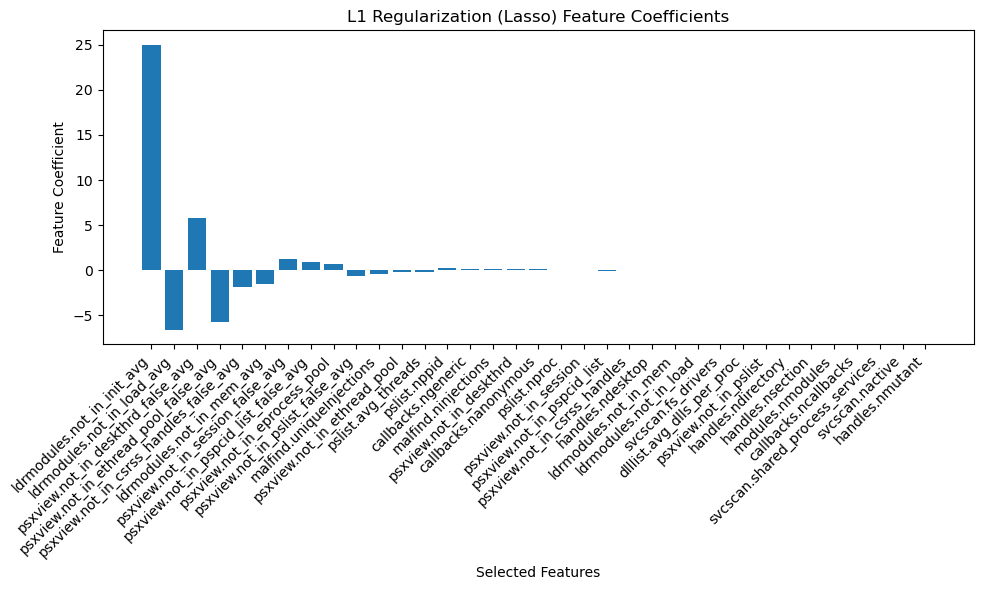

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
l2_data = df
l2_data = l2_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
l2_X = l2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
l2_y = l2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the Logistic Regression model with L1 regularization (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Step 3: Fit the Lasso model on the data
lasso.fit(l2_X, l2_y)

# Step 4: Get the feature coefficients from the model
feature_coefficients = lasso.coef_[0]

# Step 5: Sort the features and their coefficients in descending order
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
sorted_feature_coefficients = feature_coefficients[sorted_indices]
sorted_feature_names = l2_X.columns[sorted_indices]

# Step 6: Select the top 'num_features_to_select' important features
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_feature_coefficients = sorted_feature_coefficients[:num_features_to_select]

# Step 7: Create a new DataFrame with the selected features
X_selected_df = l2_X[selected_feature_names]

# Plot the L1 Regularization (Lasso) feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), selected_feature_coefficients, tick_label=selected_feature_names)
plt.xlabel('Selected Features')
plt.ylabel('Feature Coefficient')
plt.title('L1 Regularization (Lasso) Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Correlation Analysis</h3>

In [ ]:
# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.

c_data = df
c_data = c_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
c_X = c_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
c_y = c_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Calculate the correlation coefficients between each feature and the target variable
correlation_scores = c_X.corrwith(c_y)

# Step 3: Sort the features based on their absolute correlation values in descending order
sorted_indices = np.argsort(np.abs(correlation_scores))[::-1]
sorted_correlation_scores = correlation_scores[sorted_indices]
sorted_feature_names = c_X.columns[sorted_indices]

# Step 4: Select the top 'num_features_to_select' correlated features
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_correlation_scores = sorted_correlation_scores[:num_features_to_select]

# Step 5: Create a new DataFrame with the selected features
X_selected_df = c_X[selected_feature_names]

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, c_y], axis=1)

# Print the names of the selected features and their correlation scores
print("Selected Features:")
print(selected_feature_names)
print("Correlation Scores:")
print(selected_correlation_scores)


Selected Features:
Index(['dlllist.ndlls', 'handles.nport', 'handles.ndesktop', 'handles.ntimer',
       'callbacks.ngeneric', 'pslist.avg_handlers', 'handles.nsemaphore',
       'pslist.avg_threads', 'handles.nsection', 'ldrmodules.not_in_load',
       'handles.ndirectory', 'handles.nthread', 'svcscan.kernel_drivers',
       'handles.nmutant', 'svcscan.fs_drivers', 'handles.nevent',
       'svcscan.process_services', 'psxview.not_in_deskthrd_false_avg',
       'pslist.nppid', 'handles.nfile', 'dlllist.avg_dlls_per_proc',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_load_avg',
       'pslist.nprocs64bit', 'handles.nkey', 'modules.nmodules',
       'svcscan.shared_process_services', 'handles.nhandles', 'pslist.nproc',
       'psxview.not_in_csrss_handles_false_avg', 'ldrmodules.not_in_mem_avg',
       'malfind.commitCharge', 'ldrmodules.not_in_init_avg',
       'malfind.ninjections', 'psxview.not_in_ethread_pool_false_avg'],
      dtype='object')
Correlation Scores:
dlllist.ndlls

<strong>Graphical View<strong>

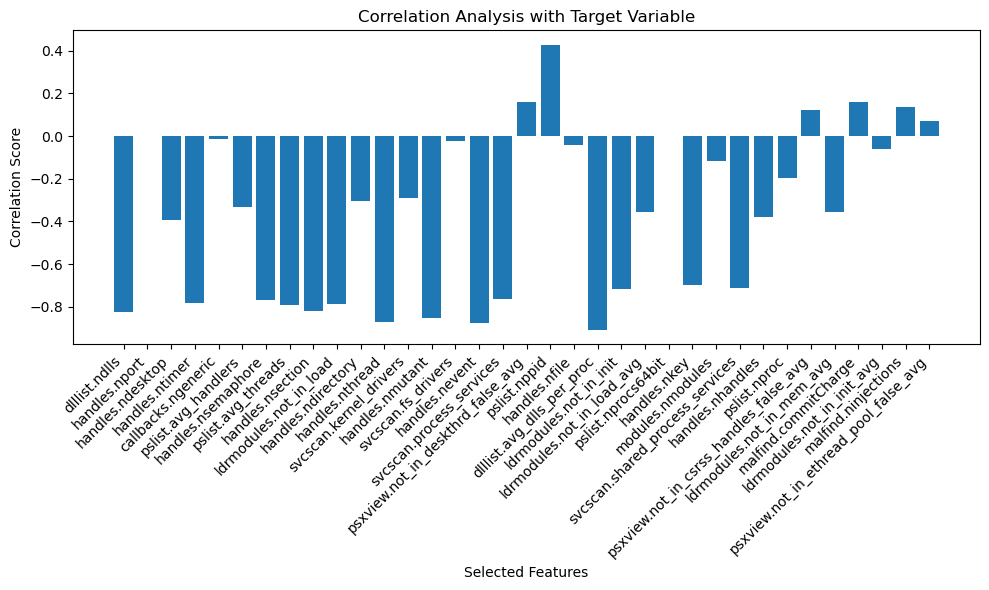

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
c2_data = df
c2_data = c2_data.drop(['Category', 'Family'], axis=1)


# Step 1: Split the data into features (X) and target (y).
c2_X = c2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
c2_y = c2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Calculate the correlation between each feature and the target variable
correlation_scores = c2_X.corrwith(c2_y)

# Step 3: Sort the features based on their correlation scores in descending order
sorted_indices = np.argsort(np.abs(correlation_scores))[::-1]
sorted_feature_scores = correlation_scores[sorted_indices]
sorted_feature_names = c2_X.columns[sorted_indices]

# Step 4: Select the top 'num_features_to_select' features based on correlation scores
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_feature_scores = sorted_feature_scores[:num_features_to_select]

# Step 5: Create a new DataFrame with the selected features
X_selected_df = c2_X[selected_feature_names]

# Plot the correlation scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), selected_feature_scores, tick_label=selected_feature_names)
plt.xlabel('Selected Features')
plt.ylabel('Correlation Score')
plt.title('Correlation Analysis with Target Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Mutual Information</h3>

In [ ]:
from sklearn.feature_selection import mutual_info_classif  # For classification tasks

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
m_data = df
m_data = m_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
m_X = m_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
m_y = m_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Calculate the mutual information between each feature and the target variable
mutual_info_scores = mutual_info_classif(m_X, m_y)

# Step 3: Sort the features based on their mutual information scores in descending order
sorted_indices = np.argsort(mutual_info_scores)[::-1]
sorted_mutual_info_scores = mutual_info_scores[sorted_indices]
sorted_feature_names = m_X.columns[sorted_indices]

# Step 4: Select the top 'num_features_to_select' features based on mutual information
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_mutual_info_scores = sorted_mutual_info_scores[:num_features_to_select]

# Step 5: Create a new DataFrame with the selected features
X_selected_df = m_X[selected_feature_names]

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, m_y], axis=1)

# Print the names of the selected features and their mutual information scores
print("Selected Features:")
print(selected_feature_names)
print("Mutual Information Scores:")
print(selected_mutual_info_scores)


Selected Features:
Index(['svcscan.nservices', 'svcscan.shared_process_services',
       'svcscan.kernel_drivers', 'dlllist.avg_dlls_per_proc',
       'handles.avg_handles_per_proc', 'pslist.avg_handlers',
       'handles.nmutant', 'handles.nevent', 'handles.nsection',
       'handles.nhandles', 'handles.nkey', 'dlllist.ndlls',
       'handles.nsemaphore', 'handles.ntimer', 'pslist.avg_threads',
       'handles.nfile', 'handles.nthread', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load', 'ldrmodules.not_in_mem_avg',
       'ldrmodules.not_in_load_avg', 'malfind.uniqueInjections',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_init_avg',
       'svcscan.nactive', 'malfind.commitCharge', 'svcscan.process_services',
       'psxview.not_in_deskthrd_false_avg', 'pslist.nppid',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'callbacks.ncallbacks',
       'malfind.protection', 'psxview.not_in_ethread_pool_false_avg',
       'psxview.not

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
m22_data = df
m22_data = m22_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
m22_X = m22_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
m22_y = m22_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Calculate the mutual information between each feature and the target variable
mutual_info_scores = mutual_info_classif(m22_X, m22_y)

# Step 2: Calculate the mutual information between each feature and the target variable
mutual_info_scores = mutual_info_classif(m22_X, m22_y)

# Step 3: Sort the features based on their mutual information scores in descending order
sorted_indices = np.argsort(mutual_info_scores)[::-1]
sorted_mutual_info_scores = mutual_info_scores[sorted_indices]
sorted_feature_names = m22_X.columns[sorted_indices]

# Print the top important features to least important features along with their Mutual Information scores
print("Top Important Features:")
for feature, score in zip(sorted_feature_names, sorted_mutual_info_scores):
    print(f"{feature}: {score:.4f}")


Top Important Features:
svcscan.nservices: 0.6861
svcscan.shared_process_services: 0.6782
svcscan.kernel_drivers: 0.6734
dlllist.avg_dlls_per_proc: 0.6724
handles.avg_handles_per_proc: 0.6583
pslist.avg_handlers: 0.6548
handles.nmutant: 0.6495
handles.nevent: 0.6419
handles.nsection: 0.6413
handles.nkey: 0.6294
handles.nhandles: 0.6291
dlllist.ndlls: 0.6280
handles.nsemaphore: 0.6196
handles.ntimer: 0.6059
pslist.avg_threads: 0.6043
handles.nfile: 0.5874
handles.nthread: 0.5855
ldrmodules.not_in_mem: 0.5841
ldrmodules.not_in_load: 0.5829
ldrmodules.not_in_mem_avg: 0.5573
ldrmodules.not_in_load_avg: 0.5572
malfind.uniqueInjections: 0.5560
ldrmodules.not_in_init: 0.5223
ldrmodules.not_in_init_avg: 0.4835
svcscan.nactive: 0.4764
malfind.commitCharge: 0.4687
svcscan.process_services: 0.3938
pslist.nppid: 0.3587
psxview.not_in_deskthrd_false_avg: 0.3585
psxview.not_in_csrss_handles_false_avg: 0.3394
psxview.not_in_session_false_avg: 0.3230
callbacks.ncallbacks: 0.3070
psxview.not_in_ethread

<strong>Graphical View</strong>

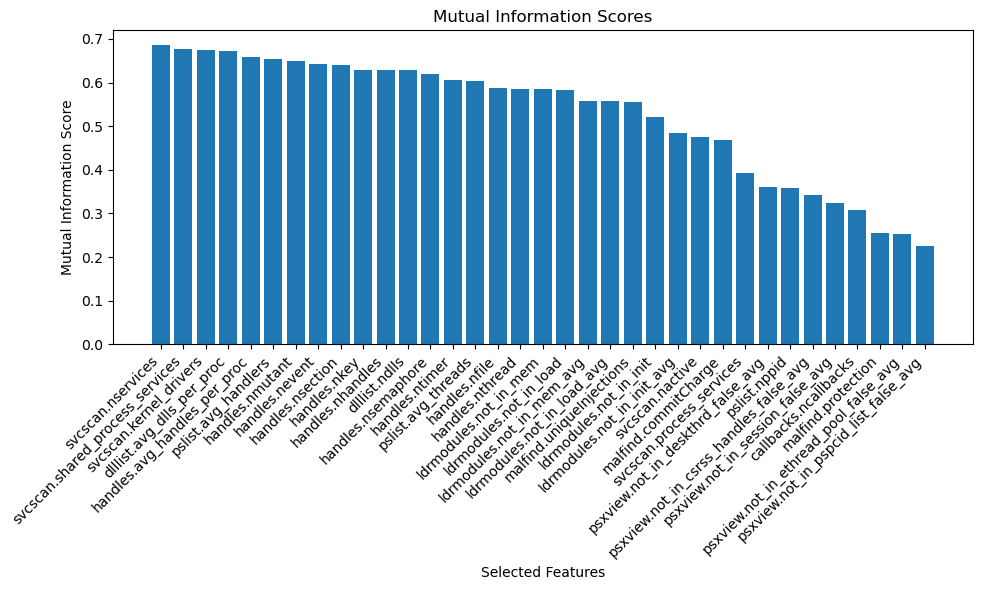

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
m2_data = df
m2_data = m2_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
m2_X = m2_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
m2_y = m2_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Calculate the mutual information between each feature and the target variable
mutual_info_scores = mutual_info_classif(m2_X, m2_y)

# Step 3: Sort the features based on their mutual information scores in descending order
sorted_indices = np.argsort(mutual_info_scores)[::-1]
sorted_mutual_info_scores = mutual_info_scores[sorted_indices]
sorted_feature_names = m2_X.columns[sorted_indices]

# Step 4: Select the top 'num_features_to_select' features based on mutual information
num_features_to_select = 35  # You can set this to the number of features you want to select.
selected_feature_names = sorted_feature_names[:num_features_to_select]
selected_mutual_info_scores = sorted_mutual_info_scores[:num_features_to_select]

# Step 5: Create a new DataFrame with the selected features
X_selected_df = m2_X[selected_feature_names]

# Plot the Mutual Information scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), selected_mutual_info_scores, tick_label=selected_feature_names)
plt.xlabel('Selected Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<strong>Combine common features selected by all above techniques<strong>

Common Important Features:
['handles.ndesktop', 'malfind.protection', 'psxview.not_in_csrss_handles_false_avg', 'handles.nport', 'malfind.commitCharge', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'handles.nthread', 'callbacks.ngeneric', 'pslist.nppid', 'svcscan.nactive', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'malfind.uniqueInjections', 'ldrmodules.not_in_load_avg', 'psxview.not_in_ethread_pool', 'handles.ntimer', 'ldrmodules.not_in_load', 'pslist.avg_handlers', 'psxview.not_in_session_false_avg', 'ldrmodules.not_in_mem', 'psxview.not_in_pspcid_list_false_avg', 'callbacks.ncallbacks', 'psxview.not_in_pspcid_list', 'modules.nmodules', 'handles.nsection', 'handles.nhandles', 'pslist.nprocs64bit', 'handles.ndirectory', 'handles.avg_handles_per_proc', 'handles.nevent', 'psxview.not_in_deskthrd_false_avg', 'psxview.not_in_csrss_handles', 'handles.nfile', 'handles.nmutant', 'dlllist.avg_dlls_per_proc', 'handles.nsemaphore', 'callbac

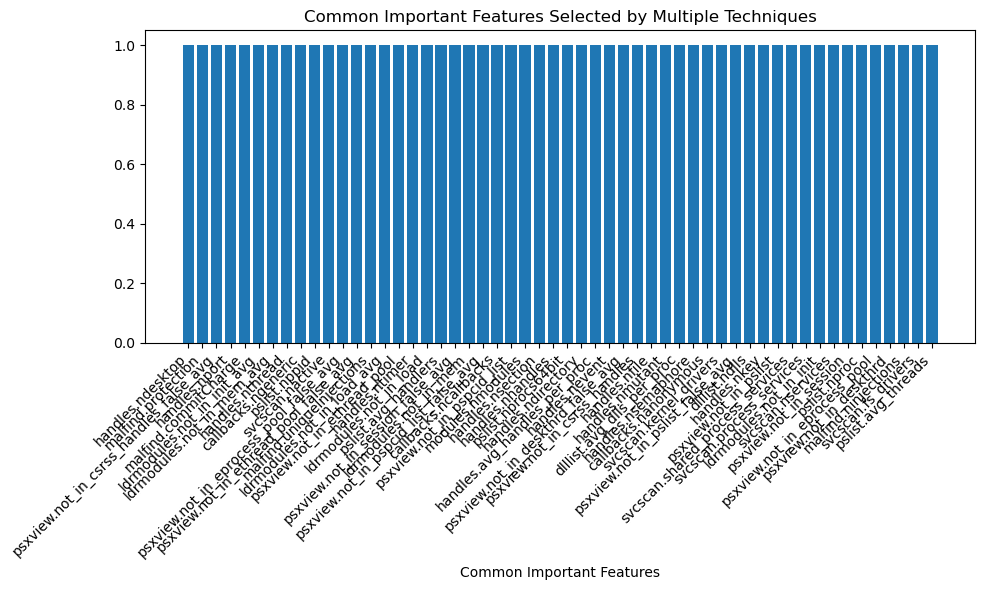

                 Common Important Features
0                         handles.ndesktop
1                       malfind.protection
2   psxview.not_in_csrss_handles_false_avg
3                            handles.nport
4                     malfind.commitCharge
5               ldrmodules.not_in_init_avg
6                ldrmodules.not_in_mem_avg
7                          handles.nthread
8                       callbacks.ngeneric
9                             pslist.nppid
10                         svcscan.nactive
11  psxview.not_in_eprocess_pool_false_avg
12   psxview.not_in_ethread_pool_false_avg
13                malfind.uniqueInjections
14              ldrmodules.not_in_load_avg
15             psxview.not_in_ethread_pool
16                          handles.ntimer
17                  ldrmodules.not_in_load
18                     pslist.avg_handlers
19        psxview.not_in_session_false_avg
20                   ldrmodules.not_in_mem
21    psxview.not_in_pspcid_list_false_avg
22         

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
com_data = df
com_data = com_data.drop(['Category', 'Family'], axis=1)
# Step 1: Split the data into features (X) and target (y).
com_X = com_data.drop(columns=['Class'])  # Replace 'target_column_name' with the actual name of the target column.
com_y = com_data['Class']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Perform Univariate Feature Selection using SelectKBest and f_classif
num_features_to_select_univariate = 40
selector_univariate = SelectKBest(score_func=f_classif, k=num_features_to_select_univariate)
X_selected_univariate = selector_univariate.fit_transform(com_X, com_y)
selected_feature_indices_univariate = selector_univariate.get_support(indices=True)
selected_feature_names_univariate = com_X.columns[selected_feature_indices_univariate]

# Step 3: Perform Recursive Feature Elimination (RFE)
num_features_to_select_rfe = 40
estimator_rfe = LogisticRegression()
rfe = RFE(estimator_rfe, n_features_to_select=num_features_to_select_rfe)
X_selected_rfe = rfe.fit_transform(com_X, com_y)
selected_feature_indices_rfe = rfe.get_support(indices=True)
selected_feature_names_rfe = com_X.columns[selected_feature_indices_rfe]

# Step 4: Perform Feature Importance from Trees using Random Forest
num_features_to_select_rf = 40
rf = RandomForestClassifier(n_estimators=100)
rf.fit(com_X, com_y)
feature_importances_rf = rf.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
selected_feature_names_rf = com_X.columns[sorted_indices_rf][:num_features_to_select_rf]

# Step 5: Perform L1 Regularization (Lasso) using Logistic Regression
num_features_to_select_lasso = 40
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(com_X, com_y)
feature_coefficients_lasso = lasso.coef_[0]
sorted_indices_lasso = np.argsort(np.abs(feature_coefficients_lasso))[::-1]
selected_feature_names_lasso = com_X.columns[sorted_indices_lasso][:num_features_to_select_lasso]

# Step 6: Perform Correlation Analysis
correlation_scores = com_X.corrwith(com_y)
sorted_indices_correlation = np.argsort(np.abs(correlation_scores))[::-1]
selected_feature_names_correlation = com_X.columns[sorted_indices_correlation][:num_features_to_select_lasso]

# Step 7: Perform Mutual Information
mutual_info_scores = mutual_info_classif(com_X, com_y)
sorted_indices_mutual_info = np.argsort(mutual_info_scores)[::-1]
selected_feature_names_mutual_info = com_X.columns[sorted_indices_mutual_info][:num_features_to_select_lasso]

# Step 8: Combine all selected features from different techniques
all_selected_features = set(selected_feature_names_univariate) \
                        .union(set(selected_feature_names_rfe)) \
                        .union(set(selected_feature_names_rf)) \
                        .union(set(selected_feature_names_lasso)) \
                        .union(set(selected_feature_names_correlation)) \
                        .union(set(selected_feature_names_mutual_info))

# Convert the set of common selected features to a list
common_selected_features = list(all_selected_features)

# Print the common important features selected by multiple techniques
print("Common Important Features:")
print(common_selected_features)

# Plot the common important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(common_selected_features)), [1] * len(common_selected_features), tick_label=common_selected_features)
plt.xlabel('Common Important Features')
plt.title('Common Important Features Selected by Multiple Techniques')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a DataFrame to store the common important features
result_df = pd.DataFrame(common_selected_features, columns=['Common Important Features'])

# Print the result DataFrame
print(result_df)

In [ ]:
a = ['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg',
       'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_deskthrd_false_avg',
       'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.process_services', 'svcscan.shared_process_services',
       'svcscan.nactive', 'callbacks.ncallbacks', 'Category', 'Family']

b = ['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init',
       'ldrmodules.not_in_mem', 'malfind.ninjections', 'malfind.commitCharge',
       'malfind.protection', 'psxview.not_in_pslist',
       'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list',
       'psxview.not_in_csrss_handles', 'psxview.not_in_session',
       'psxview.not_in_deskthrd', 'modules.nmodules', 'svcscan.nservices',
       'svcscan.kernel_drivers', 'svcscan.fs_drivers',
       'svcscan.shared_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks']

c = ['svcscan.nservices', 'svcscan.kernel_drivers',
       'handles.avg_handles_per_proc', 'handles.nmutant', 'handles.nsection',
       'pslist.avg_handlers', 'handles.nkey', 'handles.nhandles',
       'dlllist.ndlls', 'svcscan.shared_process_services', 'handles.nthread',
       'dlllist.avg_dlls_per_proc', 'handles.nevent', 'handles.nsemaphore',
       'ldrmodules.not_in_mem', 'ldrmodules.not_in_load', 'svcscan.nactive',
       'pslist.avg_threads', 'handles.nfile', 'ldrmodules.not_in_mem_avg',
       'malfind.uniqueInjections', 'svcscan.process_services',
       'handles.ntimer', 'pslist.nproc', 'ldrmodules.not_in_load_avg',
       'ldrmodules.not_in_init_avg', 'psxview.not_in_deskthrd',
       'psxview.not_in_deskthrd_false_avg', 'pslist.nppid',
       'callbacks.ncallbacks', 'malfind.protection', 'malfind.commitCharge',
       'malfind.ninjections', 'handles.ndirectory',
       'psxview.not_in_csrss_handles_false_avg']

d = ['ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg',
       'ldrmodules.not_in_load_avg', 'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_deskthrd_false_avg', 'psxview.not_in_pslist_false_avg',
       'psxview.not_in_session_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_pspcid_list_false_avg',
       'malfind.uniqueInjections', 'callbacks.nanonymous', 'pslist.nppid',
       'psxview.not_in_ethread_pool', 'pslist.avg_threads',
       'psxview.not_in_pslist', 'callbacks.ngeneric',
       'psxview.not_in_deskthrd', 'malfind.ninjections',
       'psxview.not_in_session', 'svcscan.fs_drivers', 'pslist.nproc',
       'psxview.not_in_pspcid_list', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load', 'dlllist.avg_dlls_per_proc',
       'psxview.not_in_csrss_handles', 'handles.ndirectory',
       'handles.ndesktop', 'handles.nsection', 'callbacks.ncallbacks',
       'svcscan.process_services', 'svcscan.nactive',
       'svcscan.shared_process_services', 'handles.nmutant']

e = ['dlllist.ndlls', 'handles.nport', 'handles.ndesktop', 'handles.ntimer',
       'callbacks.ngeneric', 'pslist.avg_handlers', 'handles.nsemaphore',
       'pslist.avg_threads', 'handles.nsection', 'ldrmodules.not_in_load',
       'handles.ndirectory', 'handles.nthread', 'svcscan.kernel_drivers',
       'handles.nmutant', 'svcscan.fs_drivers', 'handles.nevent',
       'svcscan.process_services', 'psxview.not_in_deskthrd_false_avg',
       'pslist.nppid', 'handles.nfile', 'dlllist.avg_dlls_per_proc',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_load_avg',
       'pslist.nprocs64bit', 'handles.nkey', 'modules.nmodules',
       'svcscan.shared_process_services', 'handles.nhandles', 'pslist.nproc',
       'psxview.not_in_csrss_handles_false_avg', 'ldrmodules.not_in_mem_avg',
       'malfind.commitCharge', 'ldrmodules.not_in_init_avg',
       'malfind.ninjections', 'psxview.not_in_ethread_pool_false_avg']

f = ['svcscan.nservices', 'svcscan.shared_process_services',
       'svcscan.kernel_drivers', 'dlllist.avg_dlls_per_proc',
       'handles.avg_handles_per_proc', 'pslist.avg_handlers',
       'handles.nmutant', 'handles.nevent', 'handles.nsection',
       'handles.nhandles', 'handles.nkey', 'dlllist.ndlls',
       'handles.nsemaphore', 'handles.ntimer', 'pslist.avg_threads',
       'handles.nfile', 'handles.nthread', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load', 'ldrmodules.not_in_mem_avg',
       'ldrmodules.not_in_load_avg', 'malfind.uniqueInjections',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_init_avg',
       'svcscan.nactive', 'malfind.commitCharge', 'svcscan.process_services',
       'psxview.not_in_deskthrd_false_avg', 'pslist.nppid',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'callbacks.ncallbacks',
       'malfind.protection', 'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pslist_false_avg']

# Convert the lists to sets
set_a = set(a)
set_b = set(b)
set_c = set(c)
set_d = set(d)
set_e = set(e)
set_f = set(f)

# Find the common values using set intersection
common_values = set_a.intersection(set_b, set_c, set_d, set_e, set_f)

# Convert the common values set to a list
common_values_list = list(common_values)

# Print the common values
print("Common Important Features:")
print(common_values_list)

Common Important Features:
['handles.nmutant', 'svcscan.shared_process_services', 'ldrmodules.not_in_load', 'dlllist.avg_dlls_per_proc', 'pslist.nppid', 'pslist.avg_threads']


<h2>Classification Step 2</h2>

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Select the categorical column for label encoding
categorical_column = 'Class'

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical column
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Display the encoded dataset
print(df)

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                45            17           10.555556                   0   
1                47            19           11.531915                   0   
2                40            14           14.725000                   0   
3                32            13           13.500000                   0   
4                42            16           11.452381                   0   
...             ...           ...                 ...                 ...   
58591            37            15           10.108108                   0   
58592            37            14            9.945946                   0   
58593            38            15            9.842105                   0   
58594            37            15           10.243243                   0   
58595            38            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # You can use other scoring functions for different types of problems.

# Assuming you have your dataset loaded into a pandas DataFrame named 'data' and the target variable in a separate Series named 'target'.
#Separate the features from the target variable (if applicable)
uni_data = df

#uni_data = uni_data.drop(['Category', 'Family'], axis=1)

# Step 1: Split the data into features (X) and target (y).
uni_X = data.drop(columns=['Category'])  # Replace 'target_column_name' with the actual name of the target column.
uni_y = data['Category']  # Replace 'target_column_name' with the actual name of the target column.

# Step 2: Initialize the Univariate Feature Selector
num_features_to_select = 45  # You can set this to the number of features you want to select.
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Step 3: Fit the selector on the data
X_selected = selector.fit_transform(uni_X, uni_y)

# Step 4: Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Step 5: Get the names of the selected features
selected_feature_names = uni_X.columns[selected_feature_indices]

# Step 6: Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Optionally, you can merge the selected features with the target variable to create the final dataset:
final_data = pd.concat([X_selected_df, uni_y], axis=1)

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg',
       'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_pspcid_list', 'psxview.not_in_session',
       'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_sessi

<h3>Principal Component Analysis (PCA)</h3>

In [ ]:
#Import the required libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Separate the features from the target variable (if applicable)
X = df.drop(['Class', 'Category', 'Family'], axis=1)

In [ ]:
#Standardize the features using the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Apply PCA to the standardized data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#Determine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
#Optionally, you can choose the number of components to retain based on the explained variance ratio. For example, if you want to retain 95% of the variance, you can find the cumulative explained variance ratio and select the number of components that achieve or exceed the desired threshold
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

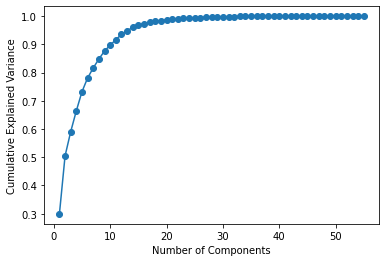

In [ ]:
#Optionally, you can visualize the explained variance ratio using a scree plot
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
#Optionally, you can access the principal components and their corresponding weights (loadings)
principal_components = pca.components_

In [ ]:
import numpy as np

# Assuming you have already performed PCA and obtained the principal components and loadings
principal_components = pca.components_
feature_names = X.columns  # Assuming X is your pandas DataFrame containing the features

# Calculate the absolute values of the loadings for each principal component
absolute_loadings = np.abs(principal_components)

# Get the indices of the top features for each principal component
top_feature_indices = np.argsort(absolute_loadings, axis=1)[:, ::-1]

# Specify the number of top features to display
num_top_features = 5  # Adjust this value as per your requirement

# Print the top features for each principal component
for i, pc in enumerate(range(principal_components.shape[0])):
    print(f"Principal Component {pc + 1}:")
    for j in range(num_top_features):
        feature_index = top_feature_indices[i, j]
        feature_name = feature_names[feature_index]
        loading = principal_components[pc, feature_index]
        print(f"   {feature_name}: {loading}")
    print()

Principal Component 1:
   handles.nevent: 0.23973636252293734
   dlllist.ndlls: 0.23951710146689925
   handles.nthread: 0.23792751571828352
   handles.ntimer: 0.23110139074527444
   handles.nmutant: 0.22996655974490826

Principal Component 2:
   psxview.not_in_ethread_pool_false_avg: 0.2782386603173158
   psxview.not_in_pslist: 0.26812813468653623
   psxview.not_in_session: 0.2681257666000823
   psxview.not_in_pspcid_list: 0.2667347391841328
   psxview.not_in_pslist_false_avg: 0.2623861460199309

Principal Component 3:
   ldrmodules.not_in_init_avg: 0.32202048826514795
   svcscan.kernel_drivers: -0.3064942853664598
   svcscan.nservices: -0.2901229461643964
   svcscan.fs_drivers: -0.2752245490555188
   ldrmodules.not_in_mem_avg: 0.26492910318316903

Principal Component 4:
   malfind.protection: -0.3133846095937989
   malfind.ninjections: -0.3133781781106485
   malfind.uniqueInjections: -0.27530994008716414
   ldrmodules.not_in_mem_avg: 0.25059921330483415
   ldrmodules.not_in_load_avg: 